# Exercise 04.1

In [1]:
# Libraries and constants

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt, log, exp
import math
import scipy
from scipy import constants
from mpl_toolkits.mplot3d import Axes3D
import subprocess

T_solid = "0.8"
T_liquid = "1.1"
T_gas = "1.2"

rho_solid = "1.1"
rho_liquid = "0.8"
rho_gas = "0.05"

rc_solid = "2.2"
rc_liquid = "2.5"
rc_gas = "5.0"

sourceDirectory = "MolecularDynamics_NVE/"

titleSize = 20
axesLabelSize = 15

In [2]:
# Functions

def set_input_file(T, rho, rc):
    subprocess.check_output(["/bin/sh", "-c", "perl -i -pe \'s/^.*.$/"+T+"/ if $. == 1\' "+sourceDirectory+"input.dat"])
    subprocess.check_output(["/bin/sh", "-c", "perl -i -pe \'s/^.*.$/"+rho+"/ if $. == 3\' "+sourceDirectory+"input.dat"])
    subprocess.check_output(["/bin/sh", "-c", "perl -i -pe \'s/^.*.$/"+rc+"/ if $. == 4\' "+sourceDirectory+"input.dat"])

def move_configuration_files(phase):
    subprocess.check_output(["/bin/sh", "-c", "cp "+sourceDirectory+"config.0 config_"+phase+".0"])
    subprocess.check_output(["/bin/sh", "-c", "cp "+sourceDirectory+"config.final config_"+phase+".final"])

def reset_configuration():
    clean_output_files()
    subprocess.check_output(["/bin/sh", "-c", "rm -rf "+sourceDirectory+"old.0"])
    subprocess.check_output(["/bin/sh", "-c", "cp "+sourceDirectory+"config.0_bak "+sourceDirectory+"config.0"])
    #subprocess.check_output(["/bin/sh", "-c", "make reset"]) # Clean previous output files
    subprocess.check_output(["/bin/sh", "-c", "make"]) # Clean previous output files

def run_simulation():
    #print(subprocess.check_output(["/bin/sh", "-c", "make run"]).decode('utf-8')) # Run the program
    subprocess.check_output(["/bin/sh", "-c", "make run"]) # Run the program
    print('Simulation')
    
def restart_simulation():
    subprocess.check_output(["/bin/sh", "-c", "mv "+sourceDirectory+"config.final "+sourceDirectory+"config.0"])
    subprocess.check_output(["/bin/sh", "-c", "mv "+sourceDirectory+"old.final "+sourceDirectory+"old.0"])
    #subprocess.check_output(["/bin/sh", "-c", "make restart"]) # Run the program
    run_simulation()
    
def clean_output_files():
    subprocess.check_output(["/bin/sh", "-c", "rm -rf "+sourceDirectory+"output_*.dat"])

def read_input_variables():
    variableArray = []
    variableCounter = 0
    with open(sourceDirectory+'input.dat', 'r') as reader:
        for line in reader:
            if line != '\n':
                variableArray.append(float(line))
                variableCounter += 1
            else:
                break
    return variableArray, variableCounter

def initial_parameters(phase):
    if phase == 'Solid':
        return T_solid, rho_solid, rc_solid,
    elif phase == 'Liquid':
        return T_liquid, rho_liquid, rc_liquid
    else:
        return T_gas, rho_gas, rc_gas

def move_output_file(destinationDirectory, fileToMove, phase):
    subprocess.check_output(["/bin/sh", "-c", "cp "+sourceDirectory+fileToMove+" "+destinationDirectory+"/"+phase+"/"+fileToMove])
    

In [3]:
def plot_output_quantities(arg0):
    size = 0
    
    
    inputDatFileSize = 0
    inputVariables = []

    inputVariables, inputDatFileSize = read_input_variables()
    
    if arg0 > 0:
        extraString = ' (Restart)'
    else:
        extraString = ''

    printStep = int(inputVariables[8])
    size = int(inputVariables[5]/printStep)
    totalEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(sourceDirectory+'output_etot.dat', 'r') as reader:
        for line in reader:
            totalEnergy[i] = float(line)
            i += 1

    potentialEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(sourceDirectory+'output_epot.dat', 'r') as reader:
        for line in reader:
            potentialEnergy[i] = float(line)
            i += 1

    kineticEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(sourceDirectory+'output_ekin.dat', 'r') as reader:
        for line in reader:
            kineticEnergy[i] = float(line)
            i += 1

    temperature = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(sourceDirectory+'output_temp.dat', 'r') as reader:
        for line in reader:
            temperature[i] = float(line)
            i += 1

    idealTemperature = np.zeros(size)
    idealTemperature = inputVariables[0]

    x = np.arange(size)
    #plt.figure(figsize=(10, 10)) 
    plt.title('Simulation '+str(arg0+1)+extraString, fontsize=titleSize)
    plt.plot(x+1, totalEnergy, label='Total Energy')
    plt.plot(x+1, potentialEnergy, color='orange', label='Potential Energy')
    plt.plot(x+1, kineticEnergy, color='green', label='Kinetic Energy')
    plt.plot(x+1, temperature, color='red', label='Temperature')
    plt.errorbar(x+1, idealTemperature, fmt='m--', label='Ideal Temperature')
    plt.legend(loc='right')
    plt.xlabel('#blocks', fontsize=axesLabelSize)
    plt.ylabel('Price', fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()

In [4]:
def plot_output_separated_quantities(arg0, plotTitleLabel, destination):
    size = 0
    inputDatFileSize = 0
    inputVariables = []

    inputVariables, inputDatFileSize = read_input_variables()
    
    printStep = int(inputVariables[8])
                
    size = int(inputVariables[5]/printStep*arg0)
    timeStep = inputVariables[4]
    
    totalEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(destination+'/'+plotTitleLabel+'/output_etot.dat', 'r') as reader:
        for line in reader:
            totalEnergy[i] = float(line)
            i += 1

    potentialEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(destination+'/'+plotTitleLabel+'/output_epot.dat', 'r') as reader:
        for line in reader:
            potentialEnergy[i] = float(line)
            i += 1

    kineticEnergy = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(destination+'/'+plotTitleLabel+'/output_ekin.dat', 'r') as reader:
        for line in reader:
            kineticEnergy[i] = float(line)
            i += 1

    temperature = np.zeros(size)
    i = 0 # numero totale di numeri generati
    with open(destination+'/'+plotTitleLabel+'/output_temp.dat', 'r') as reader:
        for line in reader:
            temperature[i] = float(line)
            i += 1

    idealTemperature = np.zeros(size)
    idealTemperature = inputVariables[0]

    x = np.arange(size)
    x = x * printStep * timeStep
    plt.figure(figsize=(15, 15)) 
    plt.subplot(221)
    plt.title('Total Energy ('+plotTitleLabel+')', fontsize=titleSize)
    plt.plot(x+1, totalEnergy, label='Total Energy')
    plt.legend(loc='right')
    plt.xlabel('time', fontsize=axesLabelSize)
    plt.ylabel('$E_{tot}$', fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10)) 
    plt.subplot(222)
    plt.title('Potential Energy ('+plotTitleLabel+')', fontsize=titleSize)
    plt.plot(x+1, potentialEnergy, color='orange', label='Potential Energy')
    plt.legend(loc='right')
    plt.xlabel('time', fontsize=axesLabelSize)
    plt.ylabel('$E_{pot}$', fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10)) 
    plt.subplot(223)
    plt.title('Kinetic Energy ('+plotTitleLabel+')', fontsize=titleSize)
    plt.plot(x+1, kineticEnergy, color='green', label='Kinetic Energy')
    plt.legend(loc='right')
    plt.xlabel('time', fontsize=axesLabelSize)
    #plt.xlabel('#steps', fontsize=axesLabelSize)
    plt.ylabel('$E_{kin}$', fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10)) 
    plt.subplot(224)
    plt.title('Temperature ('+plotTitleLabel+')', fontsize=titleSize)
    plt.plot(x+1, temperature, color='red', label='Temperature')
    plt.errorbar(x+1, idealTemperature, fmt='m--', label='Ideal Temperature')
    plt.legend(loc='right')
    plt.xlabel('time', fontsize=axesLabelSize)
    plt.ylabel('$T$', fontsize=axesLabelSize)
    plt.grid(True)
    plt.show()

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: ```config.0```) and, once the simulation is finished, it writes out the final configuration (file: ```config.final```). 
1. I added the possibility to restart a simulation reading both the actual and the old spatial configuration (respectively ```config.0``` and ```old.0```). At the end of the simulation the last spatial configuration is stored into ```config.final``` and the second to last spatial coniguration is stored into ```old.final```.  
   To enable this option you just need to set the ```readOld``` variable to ```1```. If ```old.0``` is not found then ```readOld``` is automatically set to ```0```.
2. I also added the possibility to rescale the velocities in order to match a desired temperature.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and 
2. $\vec{r}(t-dt)$ from the corresponding input files
3. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$;
4. finally obtain the actual temperature $T(t+dt/2)$
5. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
6. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
7. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
8. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

Let's start now the simulations (for solid, liquid and gas phases) to check two things:
1. Conservation of the total energy across the simulation since there aren't any external forces (it should be true with the Verlet algorithm).
2. The temperature becomes constant (thermal equilibrium).

Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation


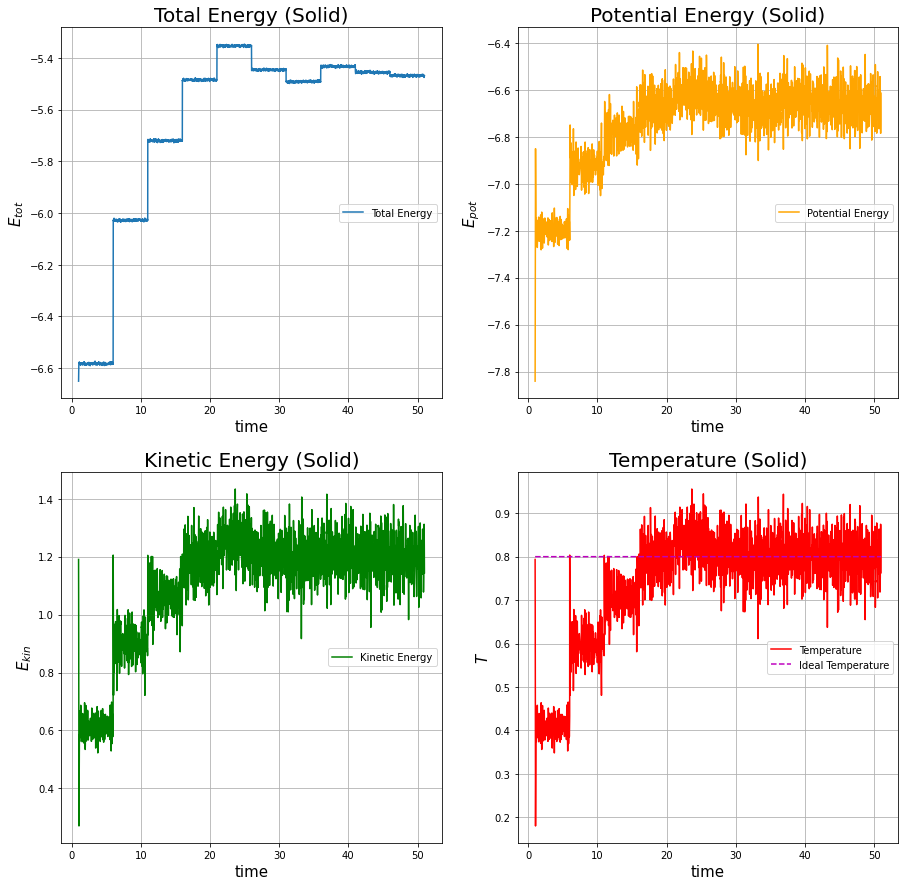

Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation


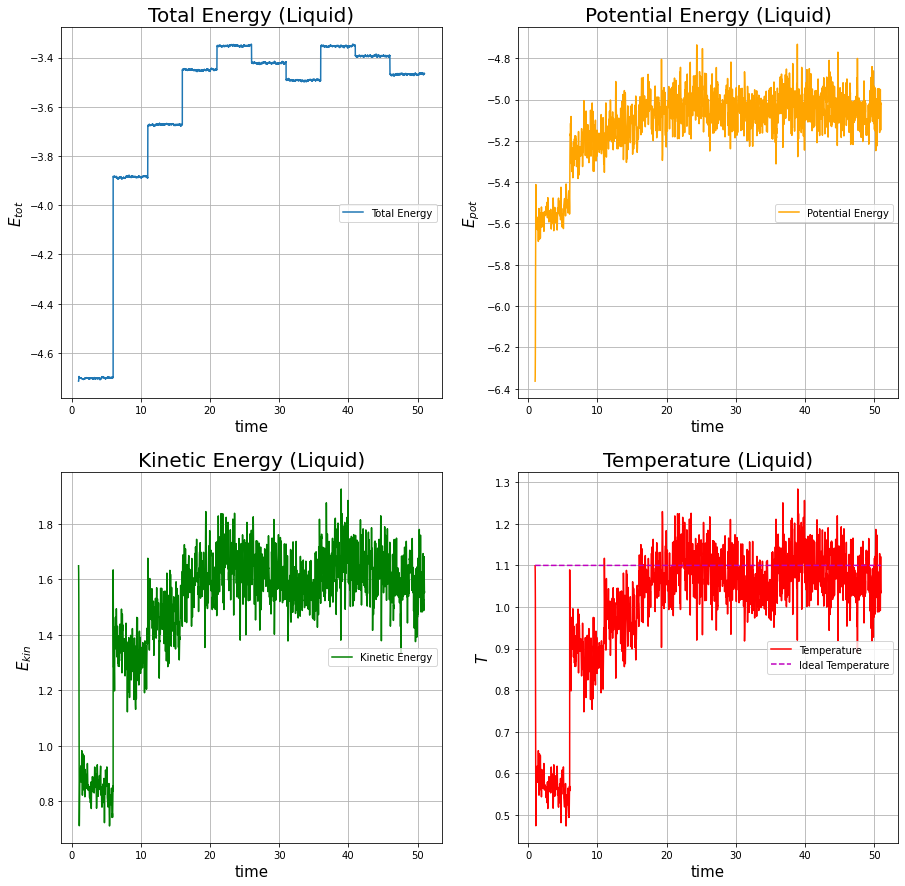

Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation
Simulation


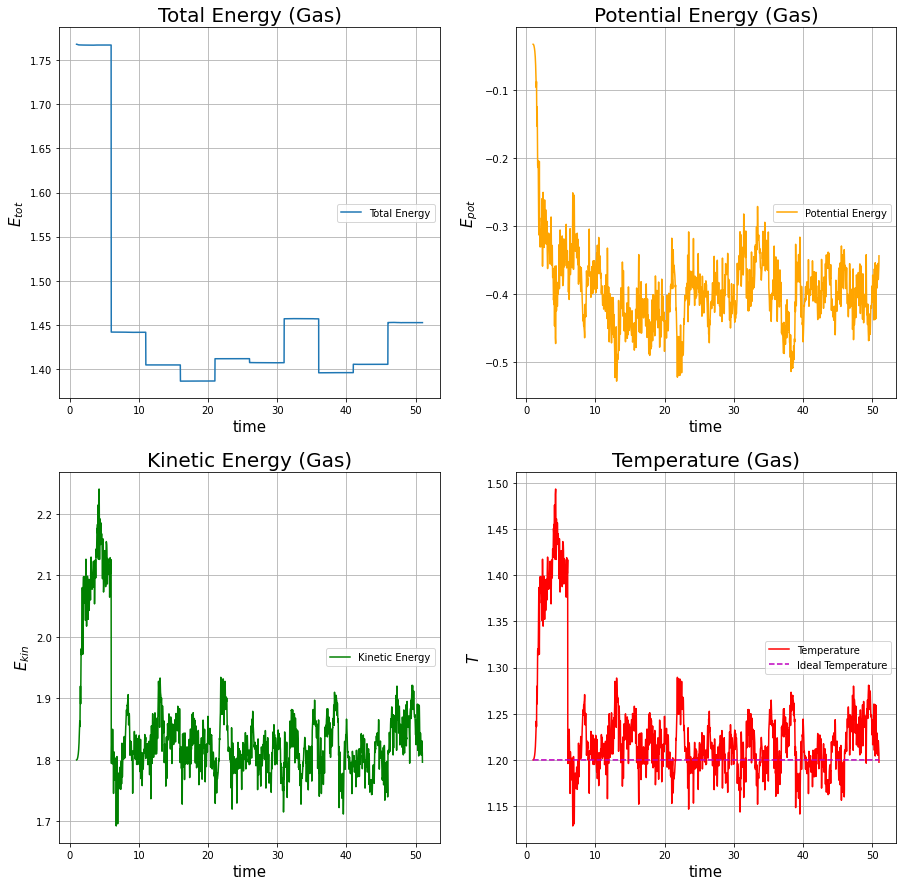

In [5]:
def equilibrium_simulation(simulationNumber, phase):
    a, b, c = initial_parameters(phase)
    set_input_file(a, b, c)
    reset_configuration()
    run_simulation()
    for i in range(1,simulationNumber):
        restart_simulation()
    
    stt = subprocess.check_output(["/bin/sh", "-c", "ls "+sourceDirectory+" | grep output_"]).decode('utf-8')

    for fileToMove in stt.split():
        #print(fileToMove)
        move_output_file('01', fileToMove, phase)
    plot_output_separated_quantities(simulationNumber, phase, '01')

numberOfSimulations = 10
equilibrium_simulation(numberOfSimulations, 'Solid')
equilibrium_simulation(numberOfSimulations, 'Liquid')
equilibrium_simulation(numberOfSimulations, 'Gas')

For all plots I used Lennard-Jones units.
The total energy is conserved. Good.  
We can also see that the system reaches the thermal equilibrium after 5 simulations (time = 25; 5000 steps).  
This is especially true for the solid, while for the liquid and gas phase we can stil see fluctuations in temperature values.

In [6]:
numberOfSimulationsForEquilibrium = 5

def equilibrate_simulation(phase):
    a, b, c = initial_parameters(phase)
    set_input_file(a, b, c)
    reset_configuration()
    run_simulation()
    for i in range(1,numberOfSimulationsForEquilibrium):
        restart_simulation()
    #equilibrium_simulation(numberOfSimulationsForEquilibrium, phase)

# Exercise 04.2

The Molecular Dynamics code prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.

I modified the code to include block averaging: 

I divided the ```nstep``` of the simulation into ```nblocks```. By exploiting these blocks, I implemented the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$, $T$ and $P$. Those values will be written in new specific output files:
 - ```ave_epot.out```;
 - ```ave_ekin.out```;
 - ```ave_etot.out```;
 - ```ave_temp.out```;
 - ```ave_pres.out```.
 
Those files are moved to a separate folder (```02```) to keep clean the source code folder.

In [8]:
def block_averaging_simulation(phase, destination, uom, restart):
    
    sigma = 0.34*(10**-9)
    if uom == 'SI':
        temperatureConverter = 120
        temperatureUom = ' [K]'
        energyConverter = temperatureConverter*scipy.constants.Boltzmann
        energyUom = ' [J]'
        pressureConverter = temperatureConverter*scipy.constants.Boltzmann/(sigma**3)
        pressureUom = ' [Pa]'
    else:
        temperatureConverter = 1
        temperatureUom = ''
        energyConverter = 1
        energyUom = ''
        pressureConverter = 1
        pressureUom = ''
    
    if restart == 'Restart':
        equilibrate_simulation(phase)
        
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/100000/ if $. == 6" '+sourceDirectory+"input.dat"])
        
    if restart == 'Restart':
        subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/1/ if $. == 11" '+sourceDirectory+"input.dat"])

        subprocess.check_output(["/bin/sh", "-c", "rm -rf "+sourceDirectory+"ave_*"])
    
        restart_simulation()
    
        stt = subprocess.check_output(["/bin/sh", "-c", "ls "+sourceDirectory+" | grep .out"]).decode('utf-8')

        for fileToMove in stt.split():
            #print(fileToMove)
            move_output_file(destination, fileToMove, phase)

    inputDatFileSize = 0
    inputVariables = []

    inputVariables, inputDatFileSize = read_input_variables()
    
    blockNumber = int(inputVariables[9])
    blockLength = int(int(inputVariables[5])/int(inputVariables[8])/blockNumber)
    
    subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/10000/ if $. == 6" '+sourceDirectory+"input.dat"])
    if restart == 'Restart':
        subprocess.check_output(["/bin/sh", "-c", 'perl -i -pe "s/^.*.$/0/ if $. == 11" '+sourceDirectory+"input.dat"])
    
    totalPotential = np.zeros(blockNumber)
    errorPotential = np.zeros(blockNumber)
    totalKinetic = np.zeros(blockNumber)
    errorKinetic = np.zeros(blockNumber)
    totalTemperature = np.zeros(blockNumber)
    errorTemperature = np.zeros(blockNumber)
    totalEnergy = np.zeros(blockNumber)
    errorEnergy = np.zeros(blockNumber)
    totalPressure = np.zeros(blockNumber)
    errorPressure = np.zeros(blockNumber)
    
    i = 0 # numero totale di numeri generati
    with open(destination+"/"+phase+'/ave_epot.out', 'r') as reader:
        for line in reader:
            totalPotential[i], errorPotential[i]= float((line.split()[0])), float((line.split()[1]))
            i += 1
    #print(totalPotential)
    i = 0 # numero totale di numeri generati
    with open(destination+"/"+phase+'/ave_ekin.out', 'r') as reader:
        for line in reader:
            totalKinetic[i], errorKinetic[i]= float((line.split()[0])), float((line.split()[1]))
            i += 1
            
    i = 0 # numero totale di numeri generati
    with open(destination+"/"+phase+'/ave_temp.out', 'r') as reader:
        for line in reader:
            totalTemperature[i], errorTemperature[i]= float((line.split()[0])), float((line.split()[1]))
            i += 1
            
    i = 0 # numero totale di numeri generati
    with open(destination+"/"+phase+'/ave_etot.out', 'r') as reader:
        for line in reader:
            totalEnergy[i], errorEnergy[i]= float((line.split()[0])), float((line.split()[1]))
            i += 1
            
    i = 0 # numero totale di numeri generati
    with open(destination+"/"+phase+'/ave_pres.out', 'r') as reader:
        for line in reader:
            totalPressure[i], errorPressure[i]= float((line.split()[0])), float((line.split()[1]))
            i += 1
            
    x = np.arange(blockNumber)
    plt.figure(figsize=(14, 21))
    plt.subplot(321)
    plt.title('Potential Energy ('+phase+')', fontsize=axesLabelSize)
    plt.errorbar(x+1, totalPotential*energyConverter, yerr=errorPotential*energyConverter, label='Potential Energy '+str(blockLength)+' values per block')
    plt.legend(loc='best')
    plt.xlabel('#Blocks', fontsize=axesLabelSize)
    plt.ylabel('$E_{pot}$'+energyUom, fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10))
    plt.subplot(322)
    plt.title('Kinetic Energy ('+phase+')', fontsize=axesLabelSize)
    plt.errorbar(x+1, totalKinetic*energyConverter, yerr=errorKinetic*energyConverter, label='Kinetic Energy '+str(blockLength)+' values per block')
    plt.legend(loc='best')
    plt.xlabel('#Blocks', fontsize=axesLabelSize)
    plt.ylabel('$E_{kin}$'+energyUom, fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10))
    plt.subplot(323)
    plt.title('Temperature ('+phase+')', fontsize=axesLabelSize)
    plt.errorbar(x+1, totalTemperature*temperatureConverter, yerr=errorTemperature*temperatureConverter, label='Temperature '+str(blockLength)+' values per block')
    plt.legend(loc='best')
    plt.xlabel('#Blocks', fontsize=axesLabelSize)
    plt.ylabel('$T$'+temperatureUom, fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10))
    plt.subplot(324)
    plt.title('Total Energy ('+phase+')', fontsize=axesLabelSize)
    plt.errorbar(x+1, totalEnergy*energyConverter, yerr=errorEnergy*energyConverter, label='Total Energy '+str(blockLength)+' values per block')
    plt.legend(loc='best')
    plt.xlabel('#Blocks', fontsize=axesLabelSize)
    plt.ylabel('$E_{tot}$'+energyUom, fontsize=axesLabelSize)
    plt.grid(True)
    #plt.show()
    
    #plt.figure(figsize=(10, 10))
    plt.subplot(325)
    plt.title('Pressure ('+phase+')', fontsize=axesLabelSize)
    plt.errorbar(x+1, totalPressure*pressureConverter, yerr=errorPressure*pressureConverter, label='Pressure '+str(blockLength)+' values per block')
    plt.legend(loc='best')
    plt.xlabel('#Blocks', fontsize=axesLabelSize)
    plt.ylabel('$p$'+pressureUom, fontsize=axesLabelSize)
    plt.grid(True)
    plt.show()

If you set the fourth argument of block_averaging_simulation function to ```'Restart'```, it will generate new output files (simulation from ```config.0``` to thermal equilibrium and then measurement with block averaging).  
If you don't want to repeat the whole process, you can set the fourth argument to something else (like ```'No restart'```). The code will then read pre-existing files.

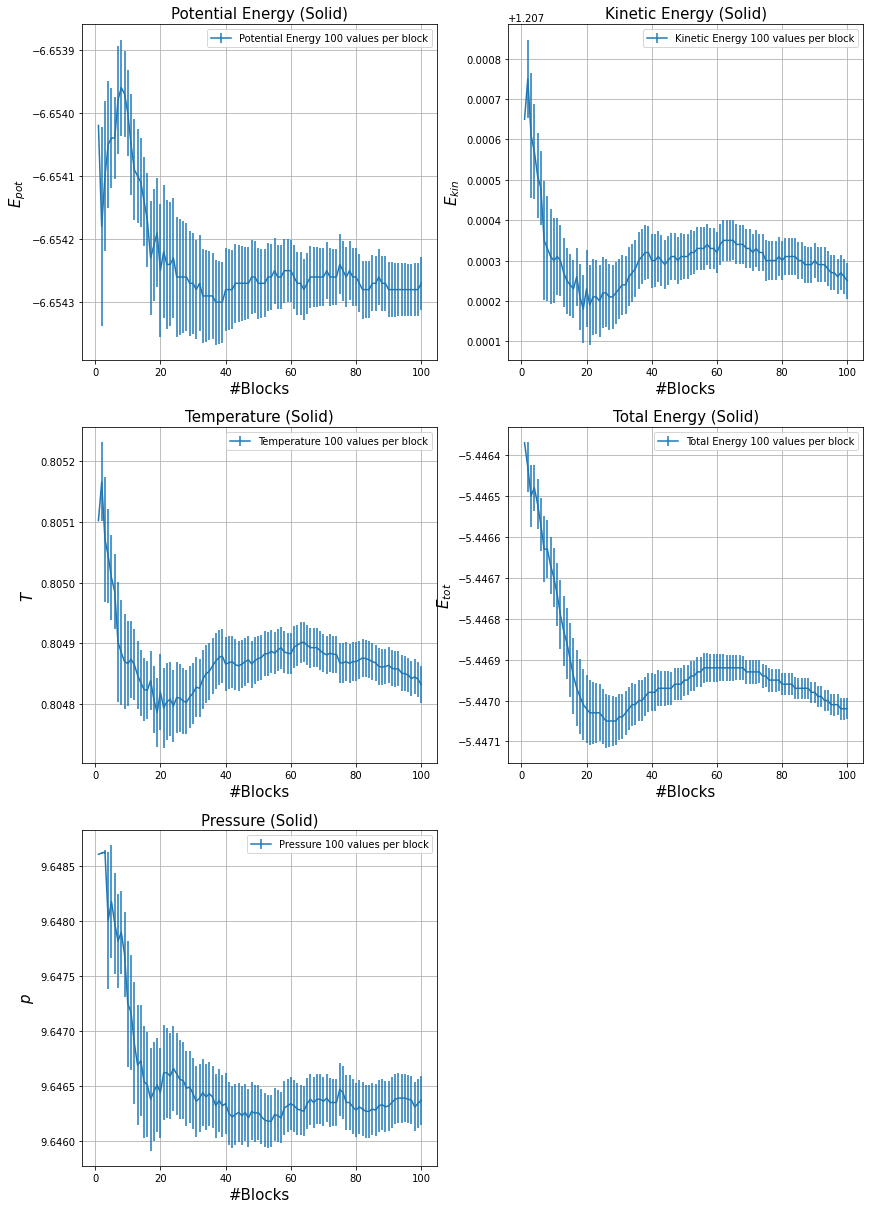

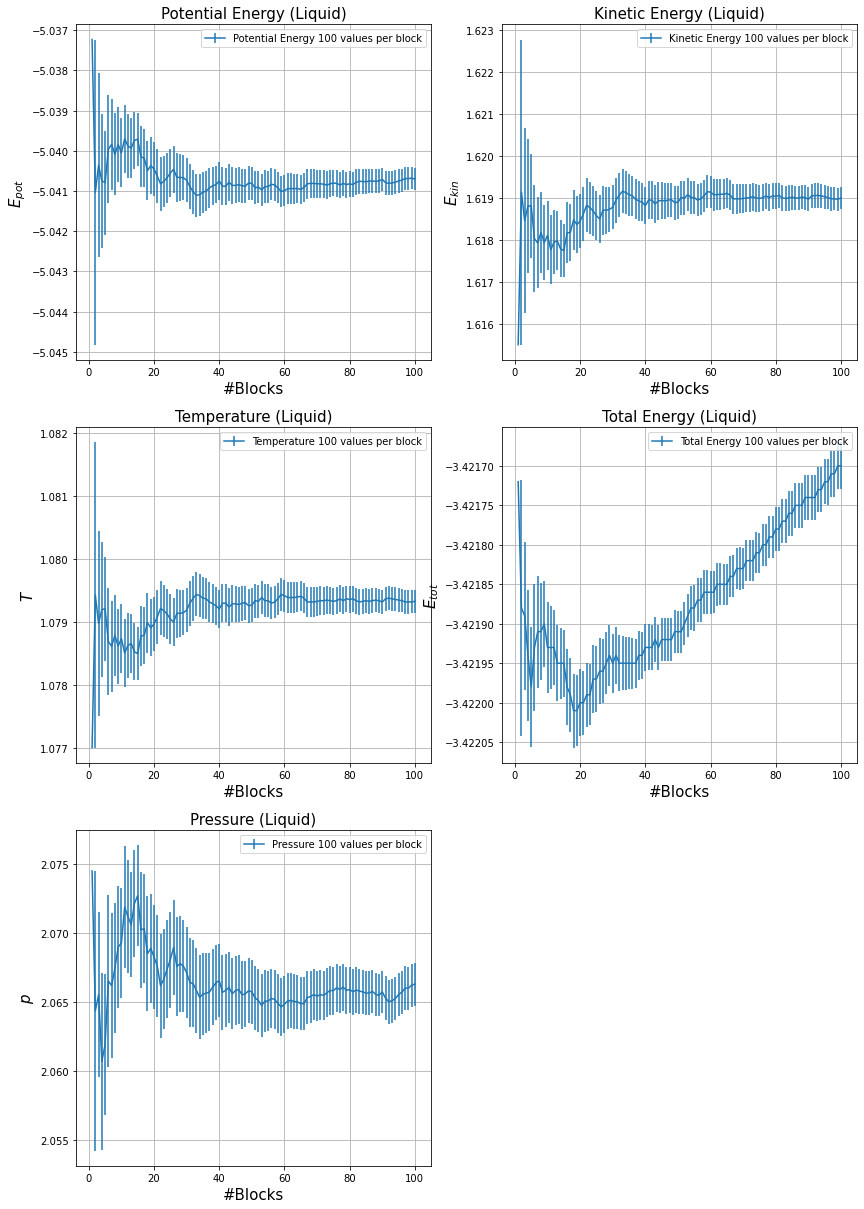

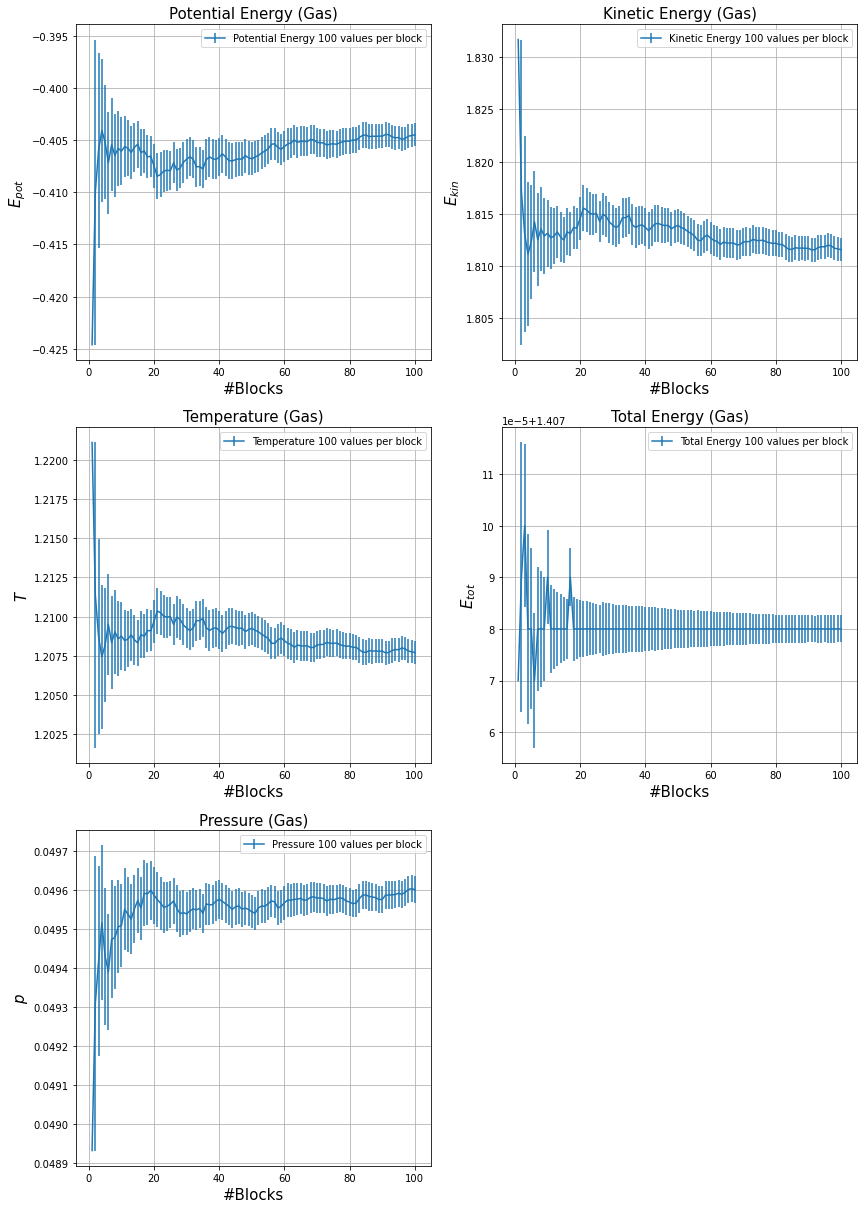

In [9]:
block_averaging_simulation('Solid', '02', '', 'No restart')
block_averaging_simulation('Liquid', '02', '', 'No restart')
block_averaging_simulation('Gas', '02', '', 'No restart')

We can see that the total energy and the temperature average values are constant throughout the simulation.  
However there are small fluctuations: these fluctuations may be reduced by increasing the number of measurements per block and by increasing the number of simulations before thermal equilibrium.

# Exercise 04.3

By means of your upgraded MD code, equilibrate and perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

(Optional exercise)

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the virial theorem, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

The code in this exercise is basically the same as Exercise 04.2. The only difference is the conversion from Lennard-Jones adimensional units to SI units (done in the python code). We can thus re-use the output files generated in the previous exercise.

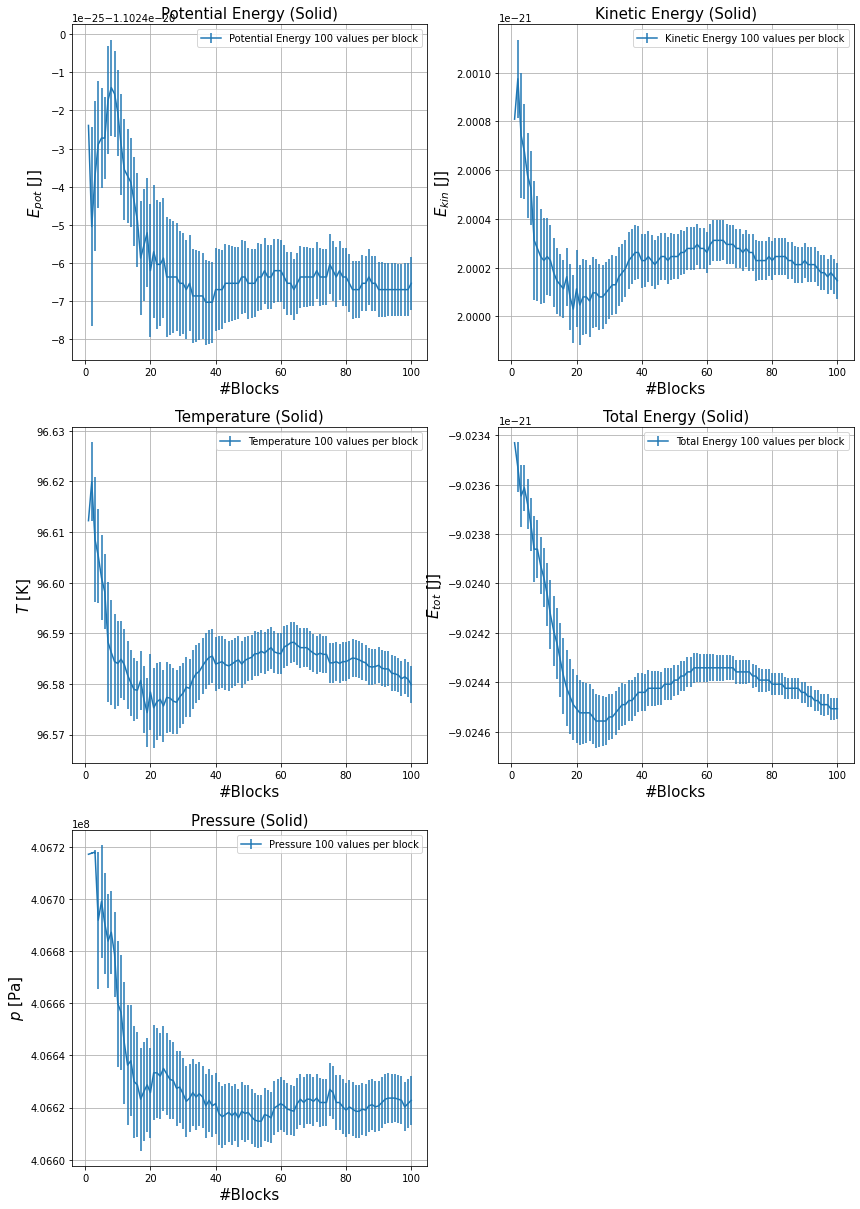

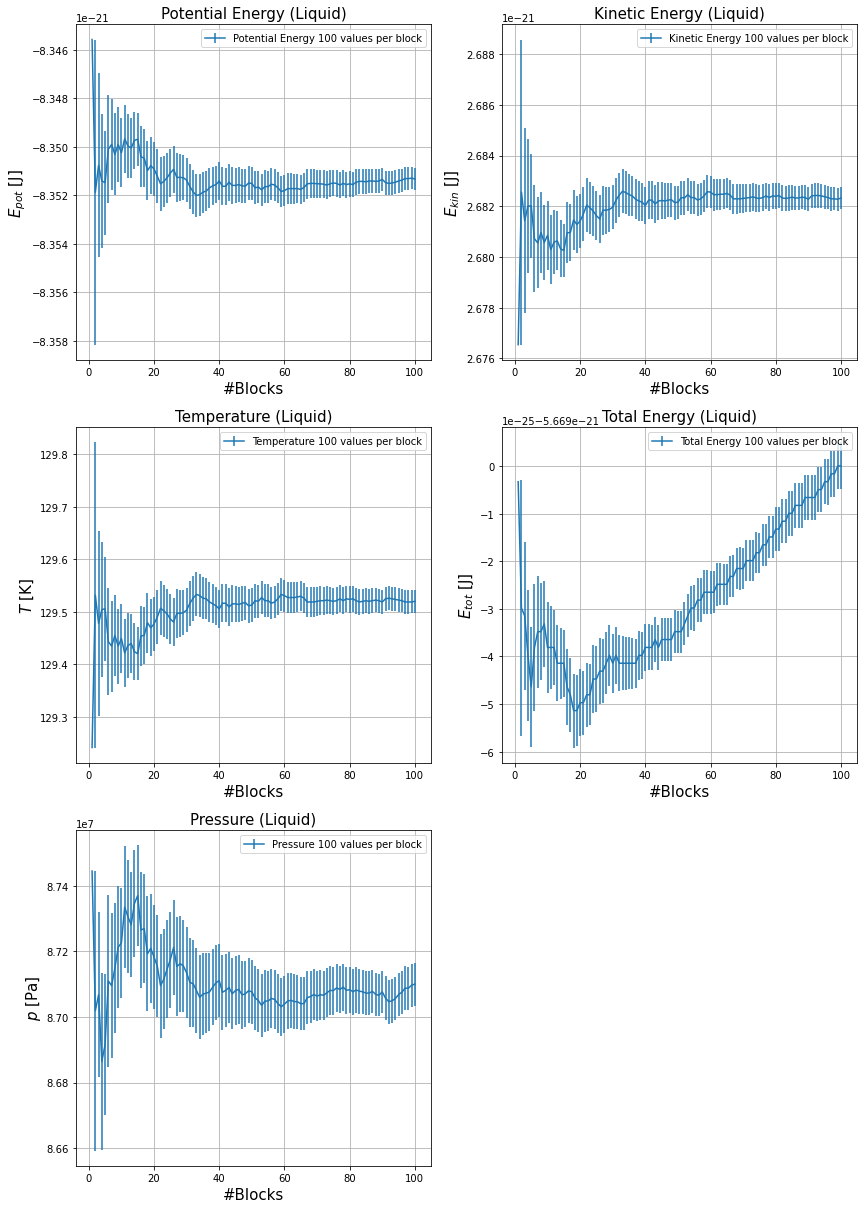

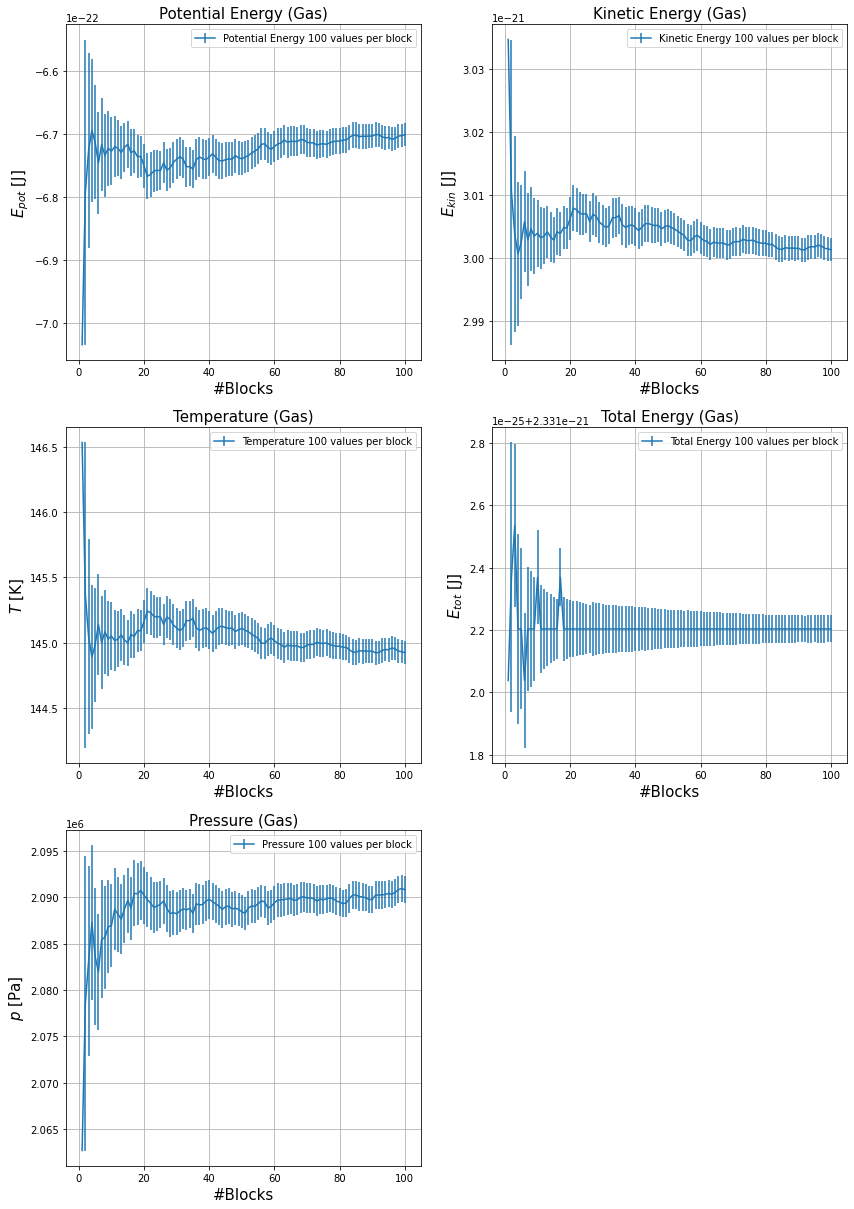

In [10]:
block_averaging_simulation('Solid', '02', 'SI', 'No restart')
block_averaging_simulation('Liquid', '02', 'SI', 'No restart')
block_averaging_simulation('Gas', '02', 'SI', 'No restart')